# Analitics. Beginner

### Task

Prepare an analytical response for Skillbox's SMM department.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import requests
import json
from datetime import datetime, timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [846]:
def getjson(url):
    response = requests.get(url)
    response = response.json()
    return response

In [847]:
vk_token = 'vk1.a.Qu5TBq9kMs-yeSarqzP8lr_rhDDjHmjDxUSNjw8fJ0ZI7qy5KevuMM_y4H7vWpiVgdUKiRYZF-lwGSyAr4U7SPyohQSM4j8qK-EpBewWdFBza1mhplb2YZY-4rTFcjWxQN_t0QCjK7nKYLxUaylcWErbu-YRrU71qGEKI9kMLOYoy67giRHrxtfOgRIugSe8'

url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&count=1&v=5.92'
response = getjson(url)

print(response)

{'response': {'count': 4931, 'items': [{'inner_type': 'wall_wallpost', 'is_pinned': 1, 'comments': {'can_post': 1, 'count': 0, 'groups_can_post': True}, 'marked_as_ads': 0, 'hash': 'bOuzWbw8H6giGgWHt6wZbX4o7g4K', 'type': 'post', 'attachments': [{'type': 'video', 'video': {'response_type': 'full', 'access_key': 'a86090ac13ab50670a', 'can_comment': 1, 'can_like': 0, 'can_repost': 0, 'can_add_to_faves': 0, 'can_add': 0, 'date': 1698239318, 'description': '', 'duration': 3, 'photo_130': 'https://i.mycdn.me/getVideoPreview?id=5361417849537&idx=6&type=39&tkn=XwkY02OgQiDP0USftXL7tMR_Kf0&fn=vid_s', 'photo_320': 'https://i.mycdn.me/getVideoPreview?id=5361417849537&idx=6&type=39&tkn=XwkY02OgQiDP0USftXL7tMR_Kf0&fn=vid_l', 'photo_800': 'https://i.mycdn.me/getVideoPreview?id=5361417849537&idx=6&type=39&tkn=XwkY02OgQiDP0USftXL7tMR_Kf0&fn=vid_x', 'photo_1280': 'https://i.mycdn.me/getVideoPreview?id=5361417849537&idx=6&type=39&tkn=XwkY02OgQiDP0USftXL7tMR_Kf0&fn=vid_w', 'first_frame_130': 'https://i.my

We are extracting the latest 100 posts from the Skillbox public page on Vkontakte for evaluating the most recent information.

In [848]:
url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&offset=1&count=100&v=5.92'
response = getjson(url)

In [849]:
#check
len(response['response']['items'])

100

In [1007]:
posts_dict = dict()

for i in range(100):
    text = response['response']['items'][i]['text']
    print(f'Текст: {text}')
    
    attachments = response['response']['items'][i]['attachments']
    attachments_set = set()
    votes = False
    for j in range(len(attachments)):
        attachment_type = response['response']['items'][i]['attachments'][j]['type']
        attachments_set.add(attachment_type)
        
        if attachment_type == "poll":
            votes = response['response']['items'][i]['attachments'][j]['poll']['votes']
            
    print(f'\nТип вложения: {attachments_set}')
    if votes:
        print(f'Проголосовали: {votes} человек')
    
    likes = response['response']['items'][i]['likes']['count']
    print(f'Лайков: {likes}')
    
    comments = response['response']['items'][i]['comments']['count']
    print(f'Комментариев: {comments}')
    
    reposts = response['response']['items'][i]['reposts']['count']
    print(f'Репостов {reposts}')
    
    views = response['response']['items'][i]['views']['count']
    print(f'Просмотров: {views}')
    
    date = response['response']['items'][i]['date']
    dt = (datetime.fromtimestamp(date) - timedelta(hours=0)).strftime('%Y-%m-%d %H:%M:%S')
    print(f'Время публикации: {dt}')
    
    print('*'*100)
    print()
    
    
    posts_dict[i] = {'text':text,
                    'likes':likes,
                    'reposts':reposts,
                    'comments': comments,
                    'views': views,
                    'attachments': attachments_set,
                    'votes': votes,
                    'date':dt
                       
                       }

Текст: У Ксении нет диплома Skillbox — так сложились обстоятельства.

Зато она собрала достойное портфолио на курсе «Профессия веб-дизайнер»: https://vk.cc/css1l4

И отправила его в студию Артемия Лебедева.

Чем все это закончилось — узнайте в карточках!
#story@skillbox

Тип вложения: {'photo'}
Лайков: 21
Комментариев: 0
Репостов 4
Просмотров: 8868
Время публикации: 2023-11-17 14:00:04
****************************************************************************************************

Текст: ИИ никогда не заменит программистов. Почему мы так уверены? Рассказываем 👇

Тип вложения: {'video'}
Лайков: 69
Комментариев: 8
Репостов 23
Просмотров: 13944
Время публикации: 2023-11-17 13:08:08
****************************************************************************************************

Текст: Кто-то уже начал считать дни до Нового года.

А для нас важнее другие цифры — карьерные изменения наших пользователей. В октябре мы помогли 297 участникам курсов Skillbox с трудоустройством, стажиро

In [1186]:
df_8 = pd.DataFrame(posts_dict).T
pd.options.display.max_colwidth = 100
df_8['time'] = df_8['date'].apply(lambda x: x[11:16])
df_8[
    ['likes', 'reposts', 'comments', 'views', 'votes']
] = df_8[
    ['likes', 'reposts', 'comments', 'views', 'votes']
].astype(int)
df_8

,text,likes,reposts,comments,views,attachments,votes,date,time
0,У Ксении нет диплома Skillbox — так сложились обстоятельства.\n\nЗато она собрала достойное порт...,21,4,0,8868,{photo},0,2023-11-17 14:00:04,14:00
1,ИИ никогда не заменит программистов. Почему мы так уверены? Рассказываем 👇,69,23,8,13944,{video},0,2023-11-17 13:08:08,13:08
2,Кто-то уже начал считать дни до Нового года.\n\nА для нас важнее другие цифры — карьерные измене...,4,2,0,6237,{video},0,2023-11-17 11:00:03,11:00
3,Вот вам миллион — на что потратите?\n\nВ преддверии «Черной пятницы» мы вместе с агентством «Анк...,18,6,22,13545,{photo},0,2023-11-16 14:30:01,14:30
4,Даниал Сиддики работает UX-дизайнером в США.\n\nПоэтому может не только взвесить плюсы и минусы ...,6,1,0,5549,{video},0,2023-11-16 10:30:01,10:30
...,...,...,...,...,...,...,...,...,...
95,"Завершилось мини-шоу от Skillbox «Кем будет дальше?».\n\nА значит, пора подвести итоги проекта! ...",11,3,2,10008,{photo},0,2023-09-18 15:20:26,15:20
96,"Разве можно чему-то научиться за пару дней?\n\nМы бы сказали, что чему-то новому можно научиться...",11,9,0,21642,{photo},0,2023-09-18 11:52:36,11:52
97,"Угадайте два слова, которые UX-дизайнеры видят в ТЗ чаще всего. \n\nЧтобы посмотреть ответ, пере...",17,4,10,22356,{photo},0,2023-09-15 17:55:33,17:55
98,Нейросеть добралась до древних видеомемов рунета.\n\nИ научилась переводить их на другие языки! ...,95,87,13,47312,{video},0,2023-09-15 14:42:22,14:42


In [1013]:
df_8.time.min()

'09:00'

In [1014]:
df_8.time.max()

'18:27'

In [1037]:
df_8.views.describe()

count      100.000000
mean     14900.870000
std       9144.270315
min       5549.000000
25%       8625.250000
50%      12678.000000
75%      17385.000000
max      56662.000000
Name: views, dtype: float64

### The histogram of views distribution.

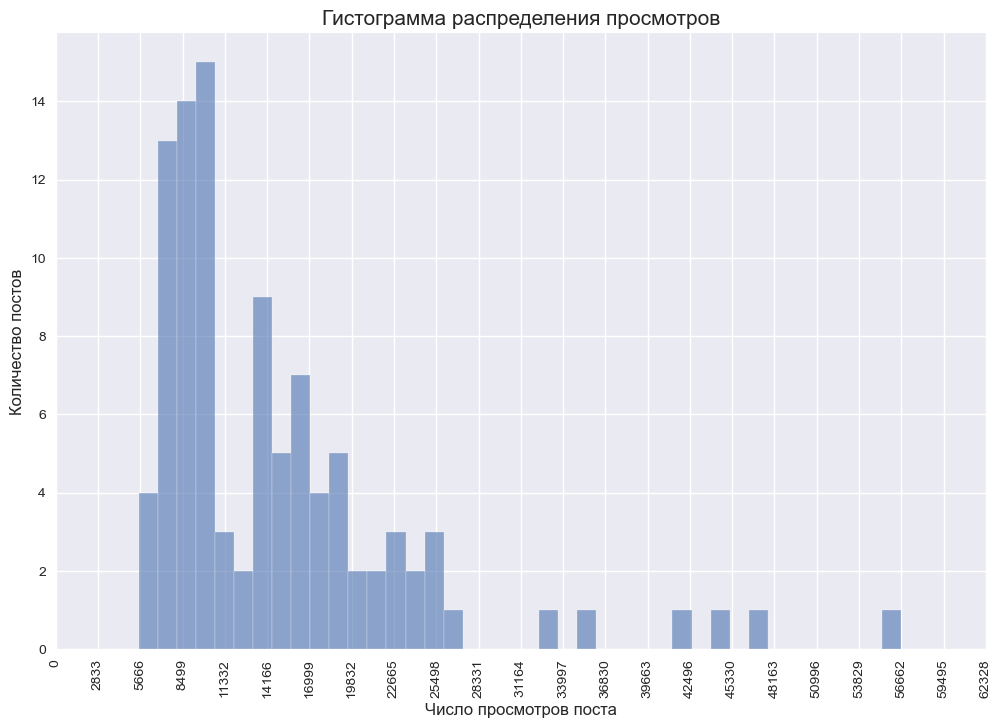

In [1049]:
fig, ax = plt.subplots(figsize=(12,8))

series = df_8['views']
plt.hist(series, bins=40, edgecolor='white', alpha=0.6)

bin_width = series.max() / 20

x_range = [i * bin_width for i in range(0, 23)]

plt.xticks(x_range, rotation=90)

ax.set_title('Гистограмма распределения просмотров', fontsize=15)
ax.set_xlabel('Число просмотров поста', fontsize=12)
ax.set_ylabel('Количество постов', fontsize=12)

plt.show()

The highest number of views falls within the range of 6600 to 18000.

### The dependency of views on the publication time.

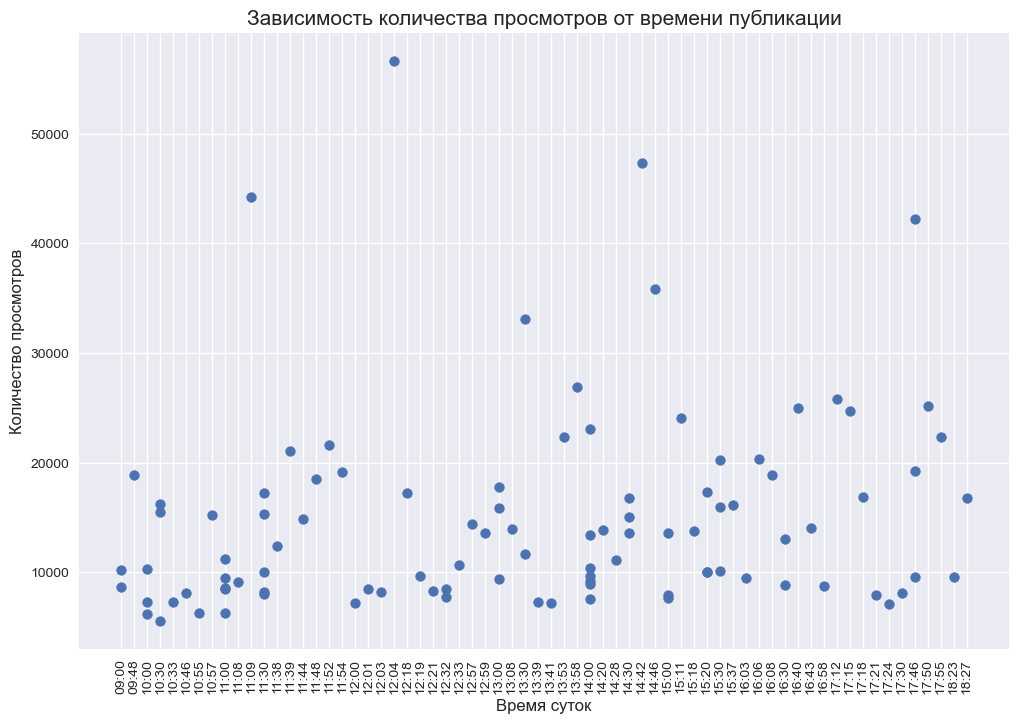

In [1069]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

data = df_8.sort_values(by='time')
ax.scatter(data['time'], data['views'], s=50)
ax.tick_params(axis='x', rotation=90)

ax.set_title('Зависимость количества просмотров от времени публикации', fontsize=15)
ax.set_xlabel('Время суток', fontsize=12)
ax.set_ylabel('Количество просмотров', fontsize=12)

plt.show()

There is no clear dependency between the number of views and the publication time.

#### Top 10 most viewed and least viewed posts.

In [1021]:
df_8.sort_values(by='views', ascending=False).head(10)

,text,likes,reposts,comments,views,attachments,votes,date,time
33,"Коллеги, признавайтесь, кто?",133,22,4,56662,{video},False,2023-10-30 12:04:43,12:04
98,Нейросеть добралась до древних видеомемов рунета.\n\nИ научилась переводить их на другие языки! ...,95,87,13,47312,{video},False,2023-09-15 14:42:22,14:42
20,"Поделитесь и своими лайфхаками, нам нужны новые идеи.",79,31,4,44200,{video},False,2023-11-07 11:09:18,11:09
72,"Земную жизнь пройдя до половины, я оказался… в офисе.\n\nМодель ада Данте устарела — она не учла...",304,226,16,42191,{photo},False,2023-10-02 17:46:29,17:46
7,"Забыть голову дома, заболеть воспалением хитрости, поднять лес рук — а вам не кажется, что некот...",85,36,18,35797,{photo},False,2023-11-14 14:46:39,14:46
63,"Ученье — свет. И хорошо, что вампиры «Сумерек» его не боятся.\n\nОни даже ходят в школу — сидят ...",69,51,0,33061,{photo},False,2023-10-09 13:30:00,13:30
94,Первый пошел. А точнее — полетел!\nВ нашей московской офлайн-школе дронов состоялся дебютный вып...,20,4,4,26930,{photo},False,2023-09-19 13:58:51,13:58
74,"Вы: «Пусть прошлое остается в прошлом».\nСториз Telegram: «Смотри, это же тот парень с концерта ...",50,13,2,25828,{photo},False,2023-09-29 17:12:02,17:12
49,Дать другу ценный совет — база.\nПоследовать этому совету самому — кринж.\n\nПотому что все лучш...,118,78,4,25188,{photo},False,2023-10-18 17:50:53,17:50
43,"Тетя Мардж превращается в шар, на голову важной гостьи падает торт, дементоры пытаются высосать ...",86,71,23,25007,{photo},False,2023-10-23 16:40:24,16:40


In [1022]:
df_8.sort_values(by='views').head(10)

,text,likes,reposts,comments,views,attachments,votes,date,time
4,Даниал Сиддики работает UX-дизайнером в США.\n\nПоэтому может не только взвесить плюсы и минусы ...,6,1,0,5549,{video},False,2023-11-16 10:30:01,10:30
31,"Подготовьте старт бизнеса за 3 дня!\n\nЗапускаем бесплатный интенсив по маркетплейсам, где вы уз...",7,4,0,6158,{video},False,2023-10-31 10:00:03,10:00
2,Кто-то уже начал считать дни до Нового года.\n\nА для нас важнее другие цифры — карьерные измене...,4,2,0,6237,{video},False,2023-11-17 11:00:03,11:00
15,"Удачно, что неделя короткая, — уже четверг!\n\nА значит, пора читать #ДайджестПоЧетвергам от Ski...",11,3,0,6240,{photo},False,2023-11-09 10:55:25,10:55
69,Чему можно научиться на курсе «UX-дизайнер с нуля до PRO»: https://vk.cc/crnFua?\n\nОткрываем ле...,7,2,0,7084,{photo},False,2023-10-04 17:24:01,17:24
39,«Я никогда не оценивал себя как победителя».\n\nДаниал долго не мог побороть синдром самозванца ...,6,2,3,7183,{photo},False,2023-10-25 13:41:56,13:41
36,"Днем она — директор по продукту в B2B, а по вечерам — создательница фэнтезийных миров.\n\nЗнаком...",7,1,6,7218,{photo},False,2023-10-27 12:00:01,12:00
52,"Автозамена часто нас подводит.\n\nНо бывают случаи, когда мы сами пишем не то, что хотели бы. Со...",19,6,0,7298,{photo},False,2023-10-17 13:39:27,13:39
34,Чтобы научиться чему-то новому нужно… много времени и денег?\n\nКак бы не так! Чтобы научиться ч...,8,6,0,7307,{photo},False,2023-10-30 10:00:02,10:00
29,🔍 Ищем посты с тегом [club66669811|Skillbox: образовательная платформа]… и находим такую прелест...,7,0,0,7309,{photo},False,2023-11-01 10:33:59,10:33


Interestingly, the least viewed posts are made in the morning from 10 AM to 12 PM, while the most viewed ones are during lunchtime, approximately from 12 PM to 3 PM. This suggests that it's better to schedule posts during the most active hours, from 12 PM to 3 PM.

### Assessment of user engagement.

#### The relationship between the number of likes and the number of views.

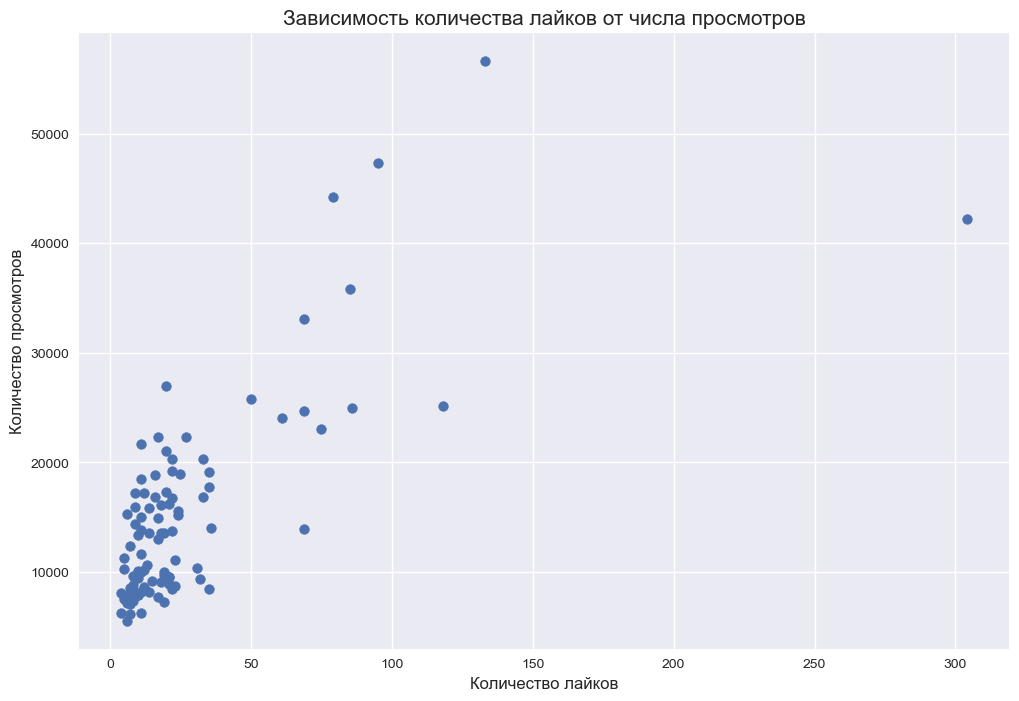

In [1076]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

ax.scatter(df_8['likes'], df_8['views'], s=50)

ax.set_title('Зависимость количества лайков от числа просмотров', fontsize=15)
ax.set_xlabel('Количество лайков', fontsize=12)
ax.set_ylabel('Количество просмотров', fontsize=12)

plt.show()

#### The correlation between the number of reposts and the number of views.

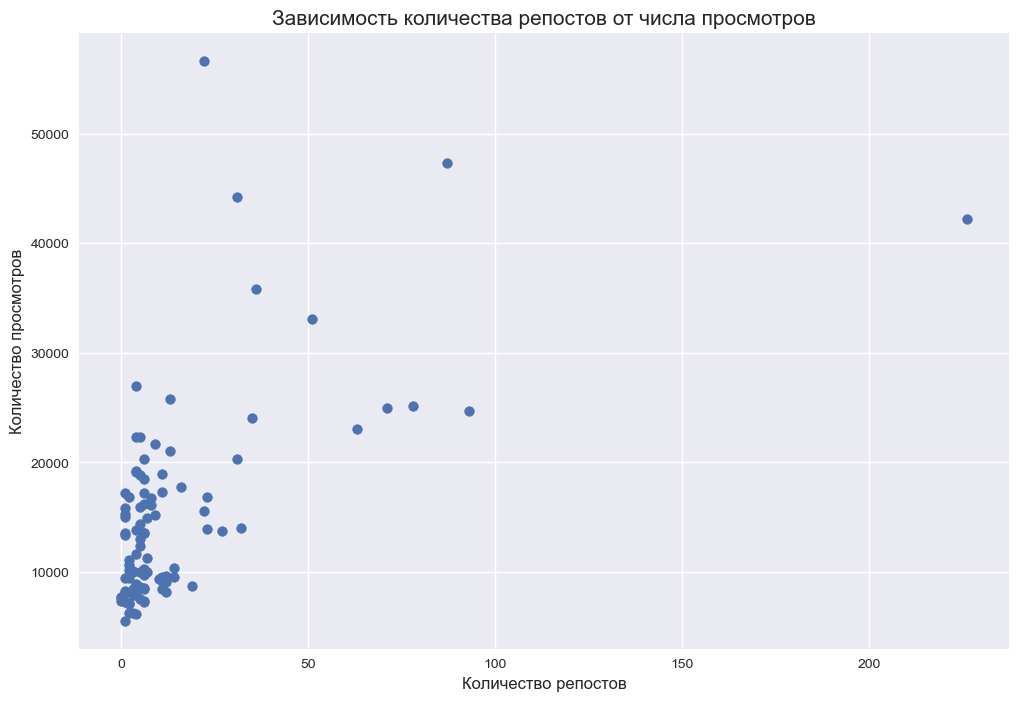

In [1074]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

ax.scatter(df_8['reposts'], df_8['views'], s=50)

ax.set_title('Зависимость количества репостов от числа просмотров', fontsize=15)
ax.set_xlabel('Количество репостов', fontsize=12)
ax.set_ylabel('Количество просмотров', fontsize=12)

plt.show()

There is a slight correlation between the number of post views and user engagement: the more views, the more likes and reposts. It's likely beneficial to make posts during the most active hours, approximately from 12 PM to 3 PM.

In [1080]:
df_8.likes.describe()

count    100.000000
mean      26.280000
std       37.260231
min        4.000000
25%        9.000000
50%       16.500000
75%       23.250000
max      304.000000
Name: likes, dtype: float64

In [1081]:
df_8.reposts.describe()

count    100.000000
mean      14.050000
std       27.948501
min        0.000000
25%        3.000000
50%        6.000000
75%       12.000000
max      226.000000
Name: reposts, dtype: float64

In [1087]:
df_8.comments.describe()

count    100.00000
mean       2.90000
std        5.46892
min        0.00000
25%        0.00000
50%        0.00000
75%        4.00000
max       29.00000
Name: comments, dtype: float64

In [1211]:
df_8.sort_values(by='comments', ascending=False).head(10)

,text,likes,reposts,comments,views,attachments,votes,date,time
55,"Python и Java — такое же вечное противостояние, как собачники и кошатники, кофеманы и чаеманы, ф...",8,0,29,7612,{poll},184,2023-10-13 15:00:02,15:00
43,"Тетя Мардж превращается в шар, на голову важной гостьи падает торт, дементоры пытаются высосать ...",86,71,23,25007,{photo},0,2023-10-23 16:40:24,16:40
3,Вот вам миллион — на что потратите?\n\nВ преддверии «Черной пятницы» мы вместе с агентством «Анк...,18,6,22,13545,{photo},0,2023-11-16 14:30:01,14:30
7,"Забыть голову дома, заболеть воспалением хитрости, поднять лес рук — а вам не кажется, что некот...",85,36,18,35797,{photo},0,2023-11-14 14:46:39,14:46
35,"Найдите себе работу по душе — и вам не придется ни дня… ныть коллегам, как все плохо.\n\nА что д...",75,63,18,23026,{photo},0,2023-10-27 14:00:01,14:00
72,"Земную жизнь пройдя до половины, я оказался… в офисе.\n\nМодель ада Данте устарела — она не учла...",304,226,16,42191,{photo},0,2023-10-02 17:46:29,17:46
98,Нейросеть добралась до древних видеомемов рунета.\n\nИ научилась переводить их на другие языки! ...,95,87,13,47312,{video},0,2023-09-15 14:42:22,14:42
97,"Угадайте два слова, которые UX-дизайнеры видят в ТЗ чаще всего. \n\nЧтобы посмотреть ответ, пере...",17,4,10,22356,{photo},0,2023-09-15 17:55:33,17:55
42,"Когда что-то кажется невозможным, вспомните этот проект.\n\nУчастница курса «Дизайнер коммерческ...",22,11,9,8463,{photo},0,2023-10-24 12:32:00,12:32
27,"За бортом поднялась «волна»! И разбилась на «овал», «вол» и «НЛО».\n\nВместе с «Другим Делом» мы...",11,3,9,8142,{video},0,2023-11-02 11:30:01,11:30


The most engaging posts involve relationships between people (colleagues, friends, family), humor, and real-life situations.

### The histogram depicting the distribution of likes.

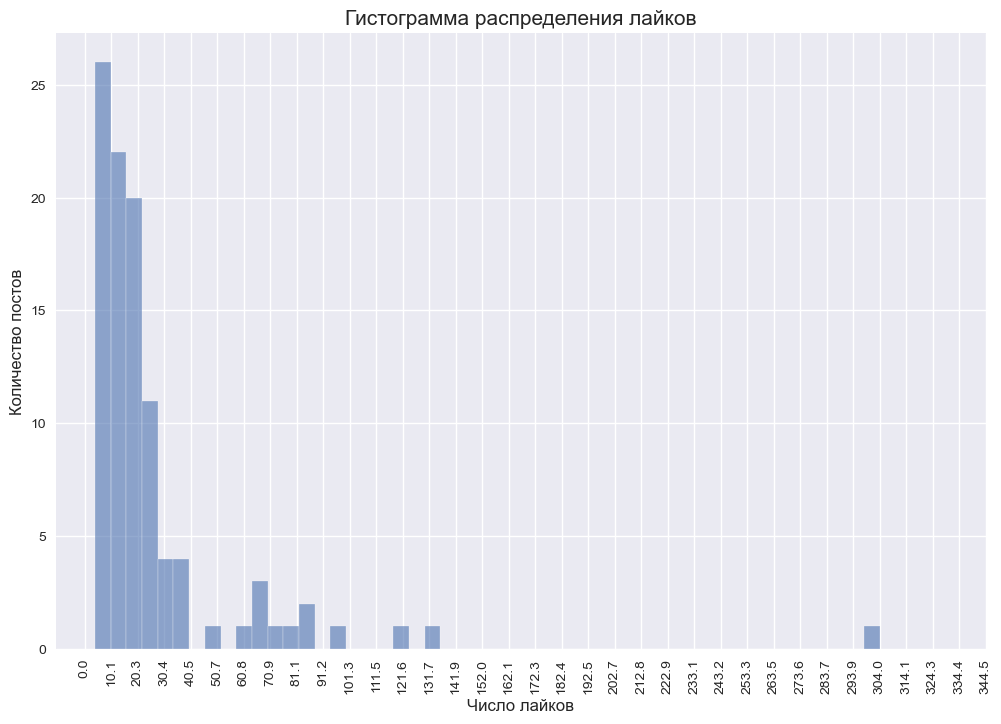

In [1082]:
fig, ax = plt.subplots(figsize=(12,8))

series = df_8['likes']
plt.hist(series, bins=50, edgecolor='white', alpha=0.6)

bin_width = series.max() / 30

x_range = [i * bin_width for i in range(0, 35)]

plt.xticks(x_range, rotation=90)

ax.set_title('Гистограмма распределения лайков', fontsize=15)
ax.set_xlabel('Число лайков', fontsize=12)
ax.set_ylabel('Количество постов', fontsize=12)

plt.show()

The range of the highest number of likes is approximately from 5 to 25.

#### The dependency of the number of likes on post publication time.

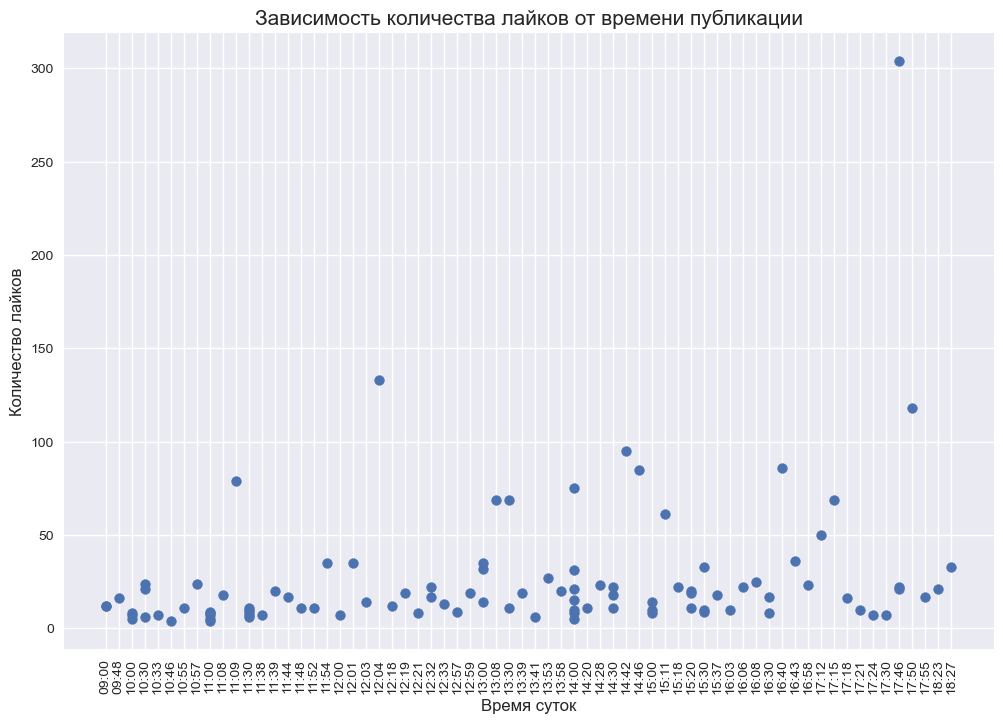

In [1085]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

data = df_8.sort_values(by='time')

ax.scatter(data['time'], data['likes'], s=50)
ax.tick_params(axis='x', rotation=90)

ax.set_title('Зависимость количества лайков от времени публикации', fontsize=15)
ax.set_xlabel('Время суток', fontsize=12)
ax.set_ylabel('Количество лайков', fontsize=12)

plt.show()

A slight increase in the number of likes during lunchtime.

### The relationship between the number of reposts and the publication time.

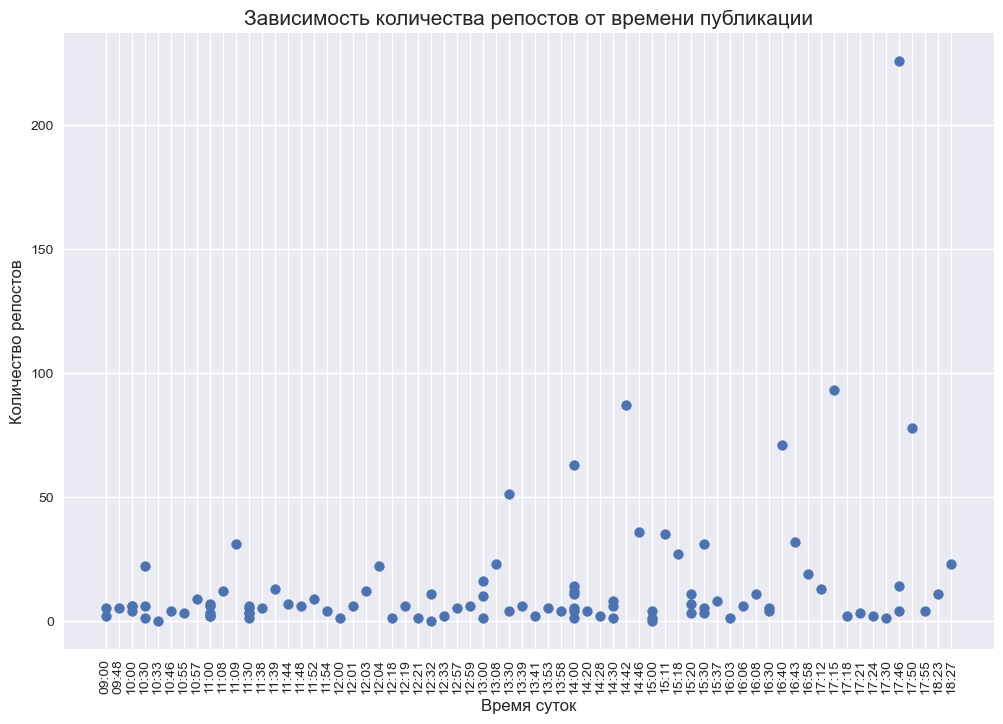

In [1090]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

data = df_8.sort_values(by='time')

ax.scatter(data['time'], data['reposts'], s=50)
ax.tick_params(axis='x', rotation=90)

ax.set_title('Зависимость количества репостов от времени публикации', fontsize=15)
ax.set_xlabel('Время суток', fontsize=12)
ax.set_ylabel('Количество репостов', fontsize=12)

plt.show()

A similar situation occurs with reposts.

In [1217]:
df_8.sort_values(by='likes', ascending=False).head(10)

,text,likes,reposts,comments,views,attachments,votes,date,time
72,"Земную жизнь пройдя до половины, я оказался… в офисе.\n\nМодель ада Данте устарела — она не учла...",304,226,16,42191,{photo},0,2023-10-02 17:46:29,17:46
33,"Коллеги, признавайтесь, кто?",133,22,4,56662,{video},0,2023-10-30 12:04:43,12:04
49,Дать другу ценный совет — база.\nПоследовать этому совету самому — кринж.\n\nПотому что все лучш...,118,78,4,25188,{photo},0,2023-10-18 17:50:53,17:50
98,Нейросеть добралась до древних видеомемов рунета.\n\nИ научилась переводить их на другие языки! ...,95,87,13,47312,{video},0,2023-09-15 14:42:22,14:42
43,"Тетя Мардж превращается в шар, на голову важной гостьи падает торт, дементоры пытаются высосать ...",86,71,23,25007,{photo},0,2023-10-23 16:40:24,16:40
7,"Забыть голову дома, заболеть воспалением хитрости, поднять лес рук — а вам не кажется, что некот...",85,36,18,35797,{photo},0,2023-11-14 14:46:39,14:46
20,"Поделитесь и своими лайфхаками, нам нужны новые идеи.",79,31,4,44200,{video},0,2023-11-07 11:09:18,11:09
35,"Найдите себе работу по душе — и вам не придется ни дня… ныть коллегам, как все плохо.\n\nА что д...",75,63,18,23026,{photo},0,2023-10-27 14:00:01,14:00
45,"Отложите дела на 5 минут — начинаем мини-урок!\n\nСегодня разбираемся, как создать мраморный эфф...",69,93,0,24683,{photo},0,2023-10-20 17:15:51,17:15
63,"Ученье — свет. И хорошо, что вампиры «Сумерек» его не боятся.\n\nОни даже ходят в школу — сидят ...",69,51,0,33061,{photo},0,2023-10-09 13:30:00,13:30


In [1214]:
df_8.sort_values(by='comments', ascending=False).head()

,text,likes,reposts,comments,views,attachments,votes,date,time
55,"Python и Java — такое же вечное противостояние, как собачники и кошатники, кофеманы и чаеманы, ф...",8,0,29,7612,{poll},184,2023-10-13 15:00:02,15:00
43,"Тетя Мардж превращается в шар, на голову важной гостьи падает торт, дементоры пытаются высосать ...",86,71,23,25007,{photo},0,2023-10-23 16:40:24,16:40
3,Вот вам миллион — на что потратите?\n\nВ преддверии «Черной пятницы» мы вместе с агентством «Анк...,18,6,22,13545,{photo},0,2023-11-16 14:30:01,14:30
7,"Забыть голову дома, заболеть воспалением хитрости, поднять лес рук — а вам не кажется, что некот...",85,36,18,35797,{photo},0,2023-11-14 14:46:39,14:46
35,"Найдите себе работу по душе — и вам не придется ни дня… ныть коллегам, как все плохо.\n\nА что д...",75,63,18,23026,{photo},0,2023-10-27 14:00:01,14:00


The most commented topic revolved around the eternal standoff between Python and Java. Following that was a post about Harry Potter's complicated relationship with his foster family. Additionally, topics about discounts/tuition payment and relationships with colleagues are also being actively discussed.

### Conclusions and Recommendations.
- The regularity of post publication is good.
- It is preferable to make posts during active hours - from 12 to 15.
- The most relevant topics are human relationships, humor, discounts on education.

### Analytics by Categories.

In [1099]:
text = '; '.join(map(str, df_8.text.values))

regular_expr = r'#\w*'
regular_expr_compiled = re.compile(regular_expr)

res = regular_expr_compiled.findall(text)

In [1109]:
hashtags = list(set(res))
hashtags

['#Skillbox_лояльность',
 '#ДайджестПоЧетвергам',
 '#Skillbox_киноимузыка',
 '#ДеньРекрутера',
 '#story',
 '#ДеньДЦП',
 '#неткибербуллингу']

In [1129]:
df_8[df_8.text.str.contains('ДеньДЦП')].likes.count()

1

In [1170]:
hashtags_dict = dict()

for i in hashtags:
    hashtags_dict[i] = {
        'posts_count': df_8[df_8.text.str.contains(i)].text.count(),
    
        'likes_max': df_8[df_8.text.str.contains(i)].likes.max(),
        'likes_min': df_8[df_8.text.str.contains(i)].likes.min(), 
    
        'reposts_max': df_8[df_8.text.str.contains(i)].reposts.max(),
        'reposts_min': df_8[df_8.text.str.contains(i)].reposts.min(), 
        
        'comments_max': df_8[df_8.text.str.contains(i)].comments.max(),
        'comments_min': df_8[df_8.text.str.contains(i)].comments.min(), 
    
    }

In [1171]:
df_9 = pd.DataFrame(hashtags_dict).T

In [1172]:
df_9.sort_values(by='posts_count', ascending=False)

,posts_count,likes_max,likes_min,reposts_max,reposts_min,comments_max,comments_min
#story,10,21,6,8,0,3,0
#Skillbox_киноимузыка,7,20,7,13,1,6,0
#ДайджестПоЧетвергам,4,11,5,5,1,0,0
#Skillbox_лояльность,1,10,10,1,1,0,0
#ДеньРекрутера,1,14,14,12,12,0,0
#ДеньДЦП,1,35,35,4,4,2,2
#неткибербуллингу,1,85,85,36,36,18,18


### The bar-chart reflecting the maximum number of likes for each hashtag.

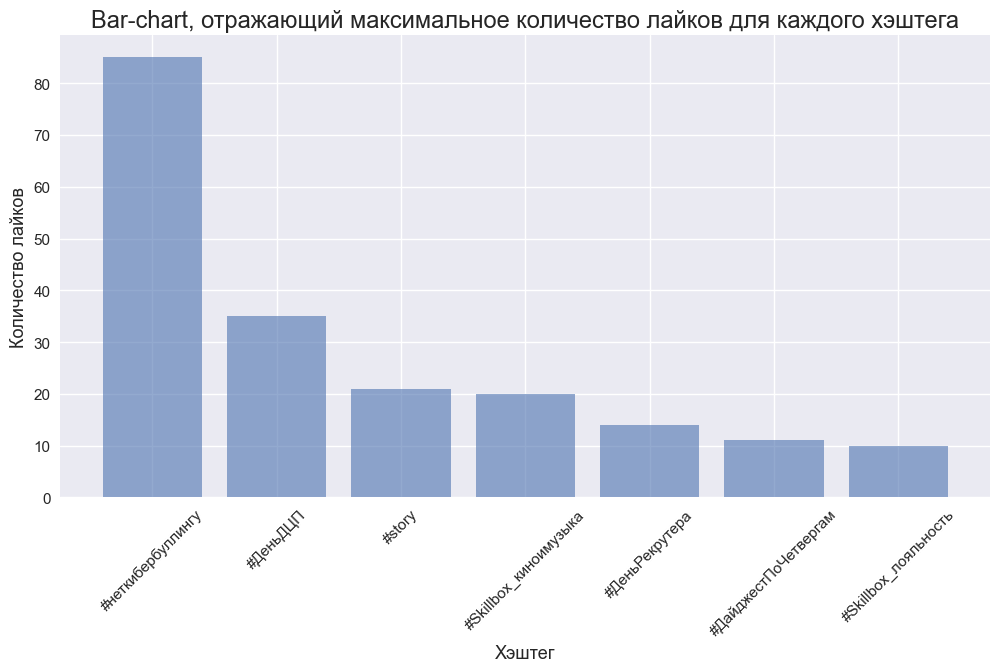

In [1169]:
fig, ax = plt.subplots(figsize=(12,6))

data = df_9.sort_values(by='likes_max', ascending=False)
plt.bar(data.index, data.likes_max, alpha=0.6)
ax.set_title('Bar-chart, отражающий максимальное количество лайков для каждого хэштега', fontsize=17)
ax.tick_params(labelsize=11)
ax.set_xlabel('Хэштег', fontsize=13)
ax.set_ylabel('Количество лайков', fontsize=13)
ax.tick_params(axis='x', rotation=45)

plt.show()

The most popular post with the hashtag #stopcyberbullying indicates that the topic of bullying, especially in childhood, remains relevant at all times. Following it in terms of likes is the hashtag #CPDay, which signifies users' concern about diseases. Then comes the hashtag #story.

The highest number of posts in the sample belong to the hashtag #story, followed by #Skillbox_киноимузыка and #ДайджестПоЧетвергам, indicating these categories as the most popular.

Perhaps, to increase user engagement, it might be beneficial to explore social issues, relationship topics, and humor more frequently.

***